In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# import dask.dataframe as dd
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase


In [5]:
# police_df = dask.datasets.read_csv('data_clean.csv')
# police_df = police_df[(police_df['month'].str.contains('2021'))]
# police_df = police_df.compute()

AttributeError: module 'dask' has no attribute 'dataframe'

In [46]:
header = pd.read_csv('data_clean.csv', nrows=1)

In [47]:
chunks = pd.read_csv('data_clean.csv', skiprows= 17500000, chunksize=100000)

In [48]:
police_df = next(chunks)

<ipython-input-48-db1fbd16da3d>:1: DtypeWarning: Columns (10,11,13,14,15,16,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  police_df = next(chunks)


In [49]:
police_df.columns = header.columns

In [50]:
police_df.head()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,...,Policing operation,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,17973559,NaN,NaN,NaN,NaN,-0.115943,51.337635,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Police and Criminal Evidence Act 1984 (section 1),NaN,Arrest,NaN,NaN
1,17973560,NaN,NaN,NaN,NaN,-0.380210,51.549005,NaN,NaN,NaN,...,NaN,Male,10-17,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,NaN,NaN
2,17973561,NaN,NaN,NaN,NaN,-0.178088,51.409804,NaN,NaN,NaN,...,NaN,Male,18-24,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
3,17973562,NaN,NaN,NaN,NaN,-0.005273,51.538895,NaN,NaN,NaN,...,NaN,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN
4,17973563,NaN,NaN,NaN,NaN,0.077910,51.538377,NaN,NaN,NaN,...,NaN,Male,25-34,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN


In [51]:
police_df = police_df.dropna(subset=['Month'])

In [52]:
police_df = police_df[(police_df['Month'].str.contains('2021'))]

In [54]:
del police_df['Unnamed: 0']

In [55]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97769 entries, 2231 to 99999
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Crime ID                                  71556 non-null  object 
 1   Month                                     97769 non-null  object 
 2   Reported by                               97769 non-null  object 
 3   Falls within                              97769 non-null  object 
 4   Longitude                                 97769 non-null  float64
 5   Latitude                                  97769 non-null  float64
 6   Location                                  97769 non-null  object 
 7   LSOA code                                 97769 non-null  object 
 8   LSOA name                                 97769 non-null  object 
 9   Crime type                                93642 non-null  object 
 10  Last outcome category               

In [56]:
police_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,...,Policing operation,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
2231,485cbbda9ccedfec9386031ee07d269fd41af1d0c4e54b...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.328504,50.836656,On or near Boundstone Close,E01031355,Adur 003D,Violence and sexual offences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2232,6e41f7abcd07264824a2330fba6fe5a047cf57a9532196...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.543188,50.813202,On or near Arundel Road,E01031454,Arun 011C,Violence and sexual offences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2233,d9de389476abbc234f347a603d1f79ae88e2a94a4c86e9...,2021-07,Metropolitan Police Service,Metropolitan Police Service,0.862312,51.138136,On or near Barn Platt,E01024029,Ashford 005E,Violence and sexual offences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2234,f9d1abfb8eeb90d3a8e37ff48ed00edce91a33529bbd40...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.838133,51.830231,On or near Aston Close,E01017707,Aylesbury Vale 012C,Violence and sexual offences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2235,20fe88d01cbed59d71bcbb0c4787708b27993407f61c39...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.833412,51.825905,On or near Hanover Close,E01017708,Aylesbury Vale 012D,Violence and sexual offences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
inflow_df = pd.read_csv("data/inflow_immigrants.csv")
outflow_df = pd.read_csv("data/outflow_immigrants.csv")
netflow_df = pd.read_csv("data/net_flow_immigrants.csv")


In [6]:
inflow_df.head()

,Borough,2003-04,2004-05,2005-06,206-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
0,City of London,308,385,480,730,419,629,621,899,698,624,698,941,927,756,"1,460","1,232"
1,Barking and Dagenham,"2,298","2,413","2,402","2,819","3,360","3,679","3,878","3,160","2,477","2,272","3,426","3,898","4,689","4,185","3,846","3,760"
2,Barnet,"6,973","8,329","6,862","8,564","8,045","7,931","7,201","8,311","6,766","6,102","7,720","8,636","8,257","7,622","7,085","7,269"
3,Bexley,842,889,"1,017","1,295","1,300","1,348","1,492","1,214",961,969,"1,144","1,284","1,408","1,159","1,273","1,171"
4,Brent,"7,855","9,478","10,426","12,482","12,182","10,281","10,228","8,829","8,046","8,326","11,257","11,727","11,598","10,765","9,182","8,801"


In [7]:
inflow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Borough  34 non-null     object
 1   2003-04  34 non-null     object
 2   2004-05  34 non-null     object
 3   2005-06  34 non-null     object
 4   206-07   34 non-null     object
 5   2007-08  34 non-null     object
 6   2008-09  34 non-null     object
 7   2009-10  34 non-null     object
 8   2010-11  34 non-null     object
 9   2011-12  34 non-null     object
 10  2012-13  34 non-null     object
 11  2013-14  34 non-null     object
 12  2014-15  34 non-null     object
 13  2015-16  34 non-null     object
 14  2016-17  34 non-null     object
 15  2017-18  34 non-null     object
 16  2018-19  34 non-null     object
dtypes: object(17)
memory usage: 4.6+ KB


In [55]:
def create_aggregated_df(df):
    # Melt the DataFrame to convert from wide to long format
    melted_df = pd.melt(df, id_vars='Borough', var_name='Year', value_name='Value')

    # Extract the year from the "Year" column
    melted_df['Year'] = melted_df['Year'].str.extract('(\d{4})')

    # Now you have the "Year" column extracted
    # You can group the data by "Borough" and "Year" and aggregate the values
    result_df = melted_df.groupby(['Borough', 'Year'])['Value'].sum().reset_index()
    result_df['Value'] = result_df['Value'].str.replace(',', '').astype(int)
    return result_df

In [61]:
inflow_grouped_df = create_aggregated_df(inflow_df)
outflow_grouped_df = create_aggregated_df(outflow_df)
netflow_grouped_df = create_aggregated_df(netflow_df)

In [57]:
inflow_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Borough  510 non-null    object
 1   Year     510 non-null    object
 2   Value    510 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 10.1+ KB


In [58]:
inflow_grouped_df

,Borough,Year,Value
0,Barking and Dagenham,2003,2298
1,Barking and Dagenham,2004,2413
2,Barking and Dagenham,2005,2402
3,Barking and Dagenham,2007,3360
4,Barking and Dagenham,2008,3679
...,...,...,...
505,Westminster,2014,16626
506,Westminster,2015,14590
507,Westminster,2016,13477
508,Westminster,2017,19459


In [62]:
outflow_grouped_df

,Borough,Year,Value
0,Barking and Dagenham,2003,524
1,Barking and Dagenham,2004,542
2,Barking and Dagenham,2005,734
3,Barking and Dagenham,2007,892
4,Barking and Dagenham,2008,948
...,...,...,...
505,Westminster,2014,6735
506,Westminster,2015,6785
507,Westminster,2016,7497
508,Westminster,2017,6779


In [60]:
netflow_grouped_df

NameError: name 'netflow_grouped_df' is not defined

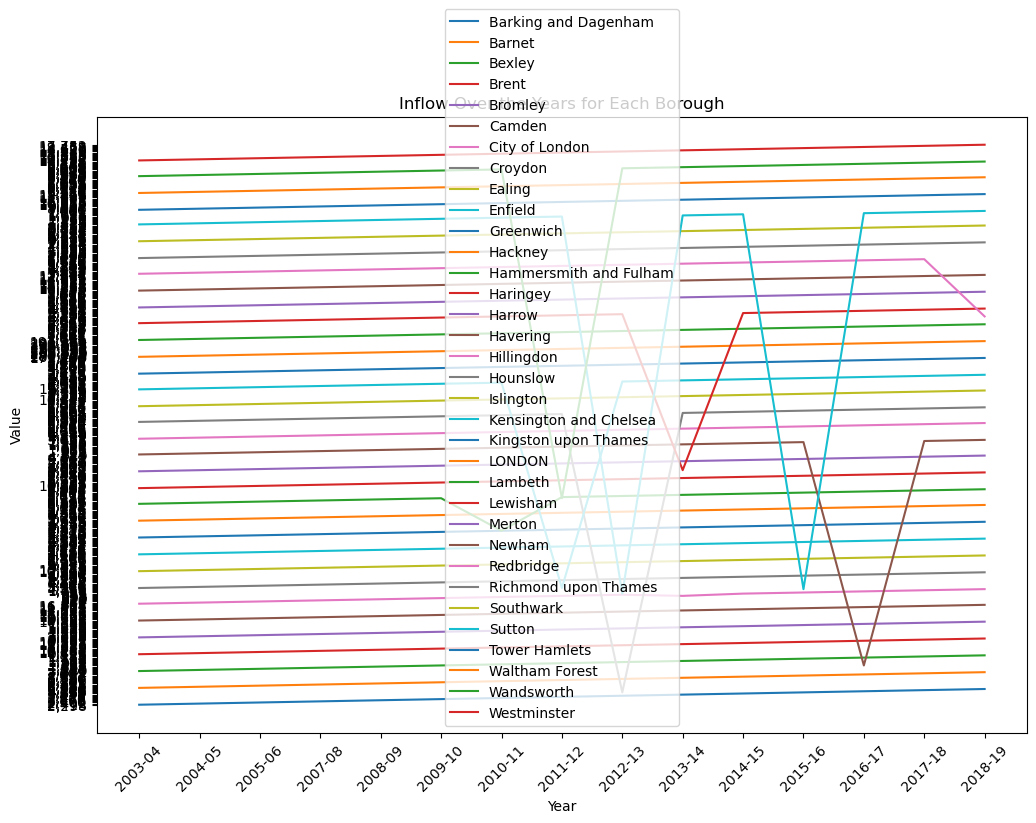

In [18]:
# # Convert "Year" column to datetime for proper sorting
# inflow_grouped_df['Year'] = pd.to_datetime(inflow_grouped_df['Year'])

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through each borough and plot its values over the years
for borough in inflow_grouped_df['Borough'].unique():
    # Filter data for the current borough
    borough_data = inflow_grouped_df[inflow_grouped_df['Borough'] == borough]
    
    # Plot the data
    ax.plot(borough_data['Year'], borough_data['Value'], label=borough)

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Inflow Over the Years for Each Borough')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

In [28]:
# Load London Borough boundaries
borough_geo = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/OA_2011_London_gen_MHW.shp')


In [29]:
borough_geo

,OA11CD,LSOA11CD,MSOA11CD,WD11CD_BF,WD11NM_BF,LAD11CD,LAD11NM,RGN11CD,RGN11NM,LSOA11NM,MSOA11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E00023264,E01004612,E02000954,E05000626,Tooting,E09000032,Wandsworth,E12000007,London,Wandsworth 032C,Wandsworth 032,462,459,3,115.2,143,3.2,"POLYGON ((527635.452 171810.058, 527495.957 17..."
1,E00003359,E01000692,E02000128,E05000111,Chislehurst,E09000006,Bromley,E12000007,London,Bromley 002D,Bromley 002,269,259,10,36.7,133,1.9,"POLYGON ((543581.516 171132.486, 543704.000 17..."
2,E00023266,E01004615,E02000956,E05000626,Tooting,E09000032,Wandsworth,E12000007,London,Wandsworth 034B,Wandsworth 034,277,277,0,183.4,133,2.1,"POLYGON ((526613.539 171839.165, 526546.840 17..."
3,E00020264,E01004027,E02000809,E05000548,Riverside,E09000028,Southwark,E12000007,London,Southwark 003E,Southwark 003,415,415,0,96.1,191,2.2,"POLYGON ((533563.521 179695.146, 533351.118 17..."
4,E00023263,E01004613,E02000955,E05000626,Tooting,E09000032,Wandsworth,E12000007,London,Wandsworth 033D,Wandsworth 033,304,304,0,165.2,131,2.3,"POLYGON ((527822.000 172020.000, 527979.000 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,E00004047,E01000828,E02000137,E05000126,Shortlands,E09000006,Bromley,E12000007,London,Bromley 011E,Bromley 011,349,349,0,43.7,117,3.0,"POLYGON ((539163.316 168360.071, 539026.000 16..."
25049,E00007044,E01001420,E02000296,E05000196,Cockfosters,E09000010,Enfield,E12000007,London,Enfield 020B,Enfield 020,288,288,0,30.5,114,2.5,"POLYGON ((528811.000 195161.000, 528814.206 19..."
25050,E00003854,E01000791,E02000155,E05000122,Orpington,E09000006,Bromley,E12000007,London,Bromley 029E,Bromley 029,284,284,0,32.1,126,2.3,"POLYGON ((546965.963 166027.878, 546947.923 16..."
25051,E00014344,E01002862,E02000590,E05000390,Hans Town,E09000020,Kensington and Chelsea,E12000007,London,Kensington and Chelsea 014E,Kensington and Chelsea 014,452,452,0,22600.0,384,1.2,"POLYGON ((527325.087 178641.434, 527321.728 17..."


,Borough,Year,Value
14,Barking and Dagenham,2018,3760
29,Barnet,2018,7269
44,Bexley,2018,1171
59,Brent,2018,8801
74,Bromley,2018,1540
89,Camden,2018,16514
104,City of London,2018,1232
119,Croydon,2018,3581
134,Ealing,2018,7334
149,Enfield,2018,4108


In [66]:
def create_london_graph(df, title, year):
    # Merge the GeoDataFrame with your DataFrame containing the aggregated values per borough and year
    df = df[df['Year'] == f'{year}']
    merged_df = borough_geo.merge(df, left_on='LAD11NM', right_on='Borough')

    # Plot the map
    fig, ax = plt.subplots(figsize=(10, 10))
    merged_df.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Add title and axis labels
    ax.set_title(f'{title} of Immigrants by London Boroughs in {year}', fontdict={'fontsize': '14', 'fontweight' : '3'})
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Show plot
    plt.show()

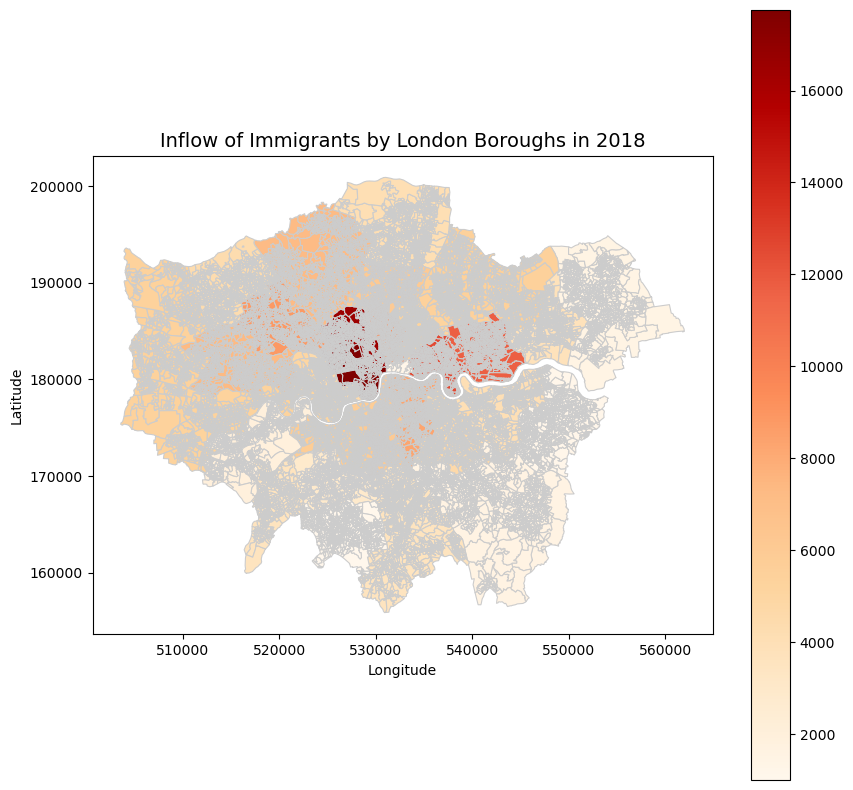

In [67]:
create_london_graph(inflow_grouped_df, "Inflow", '2018')

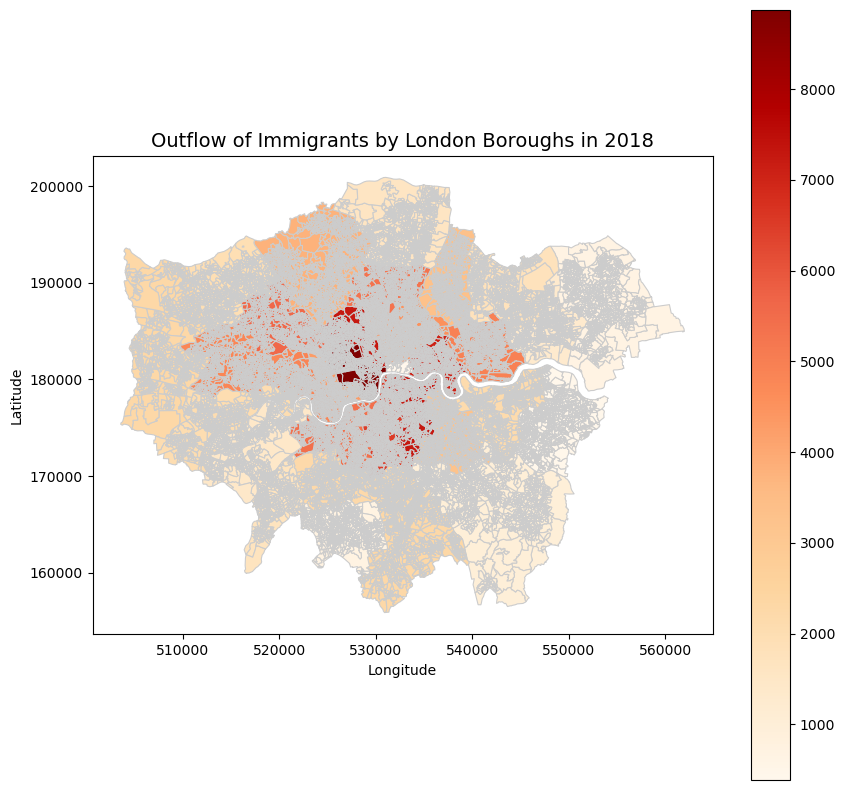

In [68]:
create_london_graph(outflow_grouped_df, "Outflow", 2018)

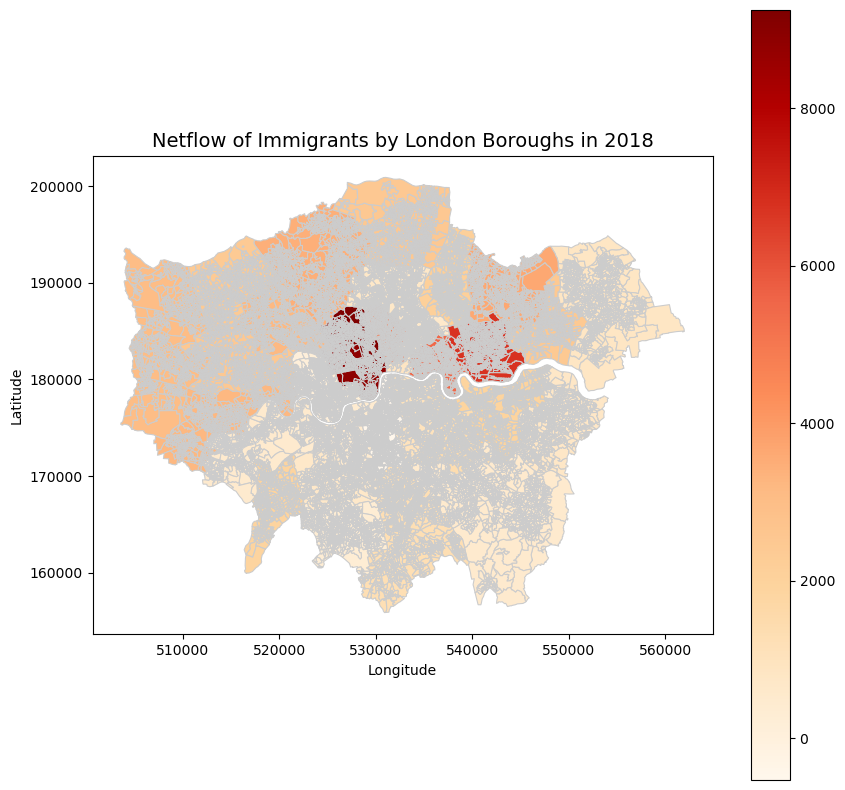

In [70]:
create_london_graph(netflow_grouped_df, "Netflow", 2018)

In [83]:
pas_df = pd.read_csv('data/PAS_ward_level_FY_18_19.csv')

C:\Users\wang-\AppData\Local\Temp\ipykernel_1292\2796793602.py:1: DtypeWarning: Columns (25,26,27,28,108,109,110,112,113,137,202,203,381) have mixed types. Specify dtype option on import or set low_memory=False.
  pas_df = pd.read_csv('data/PAS_ward_level_FY_18_19.csv')


In [74]:
pas_df

,Unnamed: 0,interview_date,MONTH,FinancialYear,ward,ward_n,ward_unique,SOA1,SOA2,BOROUGHNEIGHBOURHOOD,...,WT_Q54_B,WT_Q54_E,WT_Q55,WT_Q55_B,WT_Q55_E,WT_Q56,WT_Q56_B,WT_Q56_E,WT_Discrete,WT_Discrete_rebased
0,1,1.374278e+10,85 (Apr 2018),14,E05009396,Golborne,Golborne - Kensington and Chelsea ...,E01002852,E02000577,Kensington and Chelsea - Notting Hill,...,0.403869,0.403869,NaN,0.403869,0.403869,NaN,0.403869,0.403869,0.404216,0.403460
1,2,1.374261e+10,85 (Apr 2018),14,E05009394,Dalgarno,Dalgarno - Kensington and Chelsea ...,E01002905,E02000578,Kensington and Chelsea - Notting Hill,...,0.419229,0.419229,NaN,0.419229,0.419229,NaN,0.419229,0.419229,0.419589,0.418804
2,3,1.374261e+10,85 (Apr 2018),14,E05009394,Dalgarno,Dalgarno - Kensington and Chelsea ...,E01002905,E02000578,Kensington and Chelsea - Notting Hill,...,0.478010,0.478010,NaN,0.478010,0.478010,NaN,0.478010,0.478010,0.478420,0.477525
3,4,1.374278e+10,85 (Apr 2018),14,E05009396,Golborne,Golborne - Kensington and Chelsea ...,E01002852,E02000577,Kensington and Chelsea - Notting Hill,...,0.426503,0.426503,NaN,0.426503,0.426503,NaN,0.426503,0.426503,0.426869,0.426070
4,5,1.374278e+10,85 (Apr 2018),14,E05009396,Golborne,Golborne - Kensington and Chelsea ...,E01002852,E02000577,Kensington and Chelsea - Notting Hill,...,0.370973,0.370973,NaN,0.370973,0.370973,NaN,0.370973,0.370973,0.371291,0.370597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,12807,1.377225e+10,96 (Mar 2019),14,E05000568,The Wrythe,The Wrythe - Sutton ...,E01004163,E02000844,Sutton - North,...,NaN,NaN,NaN,NaN,NaN,0.965135,0.965512,0.965512,0.965135,0.964532
12807,12808,1.377207e+10,96 (Mar 2019),14,E05000568,The Wrythe,The Wrythe - Sutton ...,E01004163,E02000844,Sutton - North,...,NaN,NaN,NaN,NaN,NaN,0.491472,0.491663,0.491663,0.491472,0.491165
12808,12809,1.377225e+10,96 (Mar 2019),14,E05000568,The Wrythe,The Wrythe - Sutton ...,E01004167,E02000844,Sutton - North,...,NaN,NaN,NaN,NaN,NaN,0.676042,0.676306,0.676306,0.676042,0.675620
12809,12810,1.377259e+10,96 (Mar 2019),14,E05000568,The Wrythe,The Wrythe - Sutton ...,E01004167,E02000844,Sutton - North,...,NaN,NaN,NaN,NaN,NaN,0.386544,0.386695,0.386695,0.386544,0.386303


In [77]:
pas_df["NQ135A_newM"].value_counts()

-                                                12571
Confidence/trust/accountability in the police       69
Name: NQ135A_newM, dtype: int64

In [84]:
pas_df["Q3C"].value_counts()

Agree                         8625
Neither agree nor disagree    1723
Strongly agree                1272
Disagree                       920
Strongly disagree              143
Name: Q3C, dtype: int64

In [85]:
# Define mapping dictionary
mapping = {
    'Strongly disagree': -2,
    'Disagree': -1,
    'Neither agree nor disagree': 0,
    'Agree': 1,
    'Strongly agree': 2
}

# Map values to codes
pas_df['Q3C'] = pas_df['Q3C'].map(mapping)


In [86]:
pas_df["Q3C"].value_counts()

 1.0    8625
 0.0    1723
 2.0    1272
-1.0     920
-2.0     143
Name: Q3C, dtype: int64

In [87]:
pas_df["C2"]

0        Kensington and Chelsea
1        Kensington and Chelsea
2        Kensington and Chelsea
3        Kensington and Chelsea
4        Kensington and Chelsea
                  ...          
12806                    Sutton
12807                    Sutton
12808                    Sutton
12809                    Sutton
12810                    Sutton
Name: C2, Length: 12811, dtype: object

In [95]:
def create_london_trust_neighbours_graph(df, title):
    # Merge the GeoDataFrame with your DataFrame containing the aggregated values per borough and year
    df = df.groupby(['C2'])['Q3C'].mean().reset_index()
    merged_df = borough_geo.merge(df, left_on='LAD11NM', right_on='C2')

    # Plot the map
    fig, ax = plt.subplots(figsize=(10, 10))
    merged_df.plot(column='Q3C', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Add title and axis labels
    ax.set_title(f'{title}', fontdict={'fontsize': '14', 'fontweight' : '3'})
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Show plot
    plt.show()

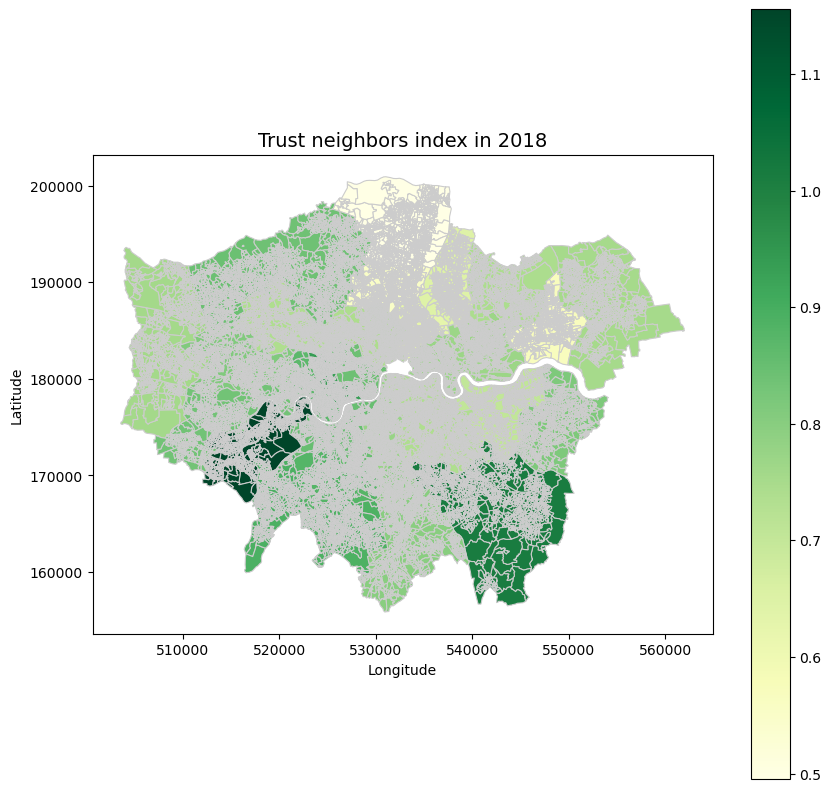

In [96]:
create_london_trust_neighbours_graph(pas_df, "Trust neighbors index in 2018")